In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, make_scorer, confusion_matrix, f1_score, recall_score, precision_score, log_loss
from sklearn.feature_selection import RFE
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv('datas.csv', delimiter = ';')

In [3]:
# Loading the first 5 samples of the dataset
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# Getting information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
# Renaming the columns in the dataset
df.columns = ['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target']

In [6]:
# Checking for duplicate values
print(f'There are {df.duplicated().sum()} duplicated values in the datset')

There are 0 duplicated values in the datset


In [7]:
# Creating a function to generate statistical summary and general information about the dataset
def summary_table(df):
    # Print the shape of the DataFrame (rows, columns)
    print(f'data shape: {df.shape}')
    
    # Create a DataFrame to hold the summary information
    summ = pd.DataFrame(df.dtypes, columns=['data type'])  # Column for data types
    
    # Add a column for the number of missing values in each column
    summ['#missing'] = df.isnull().sum().values
    
    # Add a column for the percentage of missing values in each column
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    
    # Add a column for the number of unique values in each column
    summ['#unique'] = df.nunique().values
    
    # Get descriptive statistics for all columns and transpose the DataFrame
    desc = pd.DataFrame(df.describe(include='all').transpose())
    
    # Add columns from the descriptive statistics to the summary DataFrame
    summ['count'] = desc['count'].values
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['mean'] = desc['mean'].values
    summ['std'] = desc['std'].values
    summ['median'] = desc['50%'].values
    
    
    # Return the summary DataFrame
    return summ


In [8]:
# Getting a summary of the dataset using the function created earlier
summary_table(df)

data shape: (4424, 37)


,data type,#missing,%missing,#unique,count,min,max,mean,std,median
Marital status,int64,0,0.0,6,4424.0,1.0,6.0,1.178571,0.605747,1.0
Application mode,int64,0,0.0,18,4424.0,1.0,57.0,18.669078,17.484682,17.0
Application order,int64,0,0.0,8,4424.0,0.0,9.0,1.727848,1.313793,1.0
Course,int64,0,0.0,17,4424.0,33.0,9991.0,8856.642631,2063.566416,9238.0
Daytime/evening attendance,int64,0,0.0,2,4424.0,0.0,1.0,0.890823,0.311897,1.0
Previous qualification,int64,0,0.0,17,4424.0,1.0,43.0,4.577758,10.216592,1.0
Previous qualification (grade),float64,0,0.0,101,4424.0,95.0,190.0,132.613314,13.188332,133.1
Nationality,int64,0,0.0,21,4424.0,1.0,109.0,1.873192,6.914514,1.0
Mother's qualification,int64,0,0.0,29,4424.0,1.0,44.0,19.561935,15.603186,19.0
Father's qualification,int64,0,0.0,34,4424.0,1.0,44.0,22.275316,15.343108,19.0


### Summary:

- Marital status: Most values seem to be concentrated on a specific category, as 75% of the data have a value of 1, while the max is 6.
- Application mode: It has a high standard deviation (17.48), with a mean of 18.67, indicating a wide range of modes with some large outliers (max = 57).
- Application order: Most applicants appear to be in the 1st or 2nd order, as the median (50%) is 1 and the third quartile is 2. The maximum value of 9 indicates that some applicants applied in later orders.
- Daytime/evening attendance: Most students attended during the day (median and 75th percentile = 1, with a max of 1). 
- Course: The values range widely from 33 to 9991, with an average of around 8856. The high standard deviation (2063.57) suggests that different courses have widely varying codes or identifiers.
- Admission grade: The average admission grade is around 127 with a standard deviation of 14.48. The grades span from 95 to 190.
- Age at enrollment: The median age is 20 years, with a fairly large range of 17 to 70 years. 
- Curricular units (1st and 2nd semesters): This feature includes the number of credited, enrolled, evaluated, and approved curricular units, as well as the grades. The data shows a range of involvement in curricular units across students, with most students having a median grade of 12-13 and enrolling in 6-7 units per semester.
- Unemployment rate: The unemployment rate ranges from 7.6 to 16.2, with a median of 11.1%.
- Inflation rate: The inflation rate ranges from -0.8 to 3.7, with a median of 1.4%.
- GDP: The GDP values range from -4.06 to 3.51, with a median of 0.32, indicating some fluctuation in economic growth. 


From the above chart of descriptive statistics, it can be deduced that the following columns are categorical as they appears to have specific or discrete values.
- 'Marital status'
- 'Application order'
- 'Daytime/evening attendance'
- 'Displaced'
- 'Educational special needs'
- 'Debtor',
- 'Tuition fees up to date' 
- 'Gender'
- 'Scholarship holder'
- 'International'

# Data Cleaning

In [9]:
# Initialize an empty list to store column names that are converted to categorical
cat_cols = []

# Define a function that checks the number of unique values in a given column of a DataFrame
def check_unique_values(df, column):
    # Get the count of unique values in the specified column
    unique_count = df[column].nunique()
    
    # If the number of unique values is less than or equal to 6
    if unique_count <= 6:
        # Print a message indicating that the column has 6 or fewer unique values
        print(f"Column '{column}' has {unique_count} unique values, which is <= 6.")
        
        # Convert the column to the 'category' dtype to save memory
        df[column] = df[column].astype('category')
        
        # Append the column name to the 'cat_cols' list for reference
        cat_cols.append(column)
    else:
        # Print a message indicating that the column has more than 6 unique values
        print(f"Column '{column}' has {unique_count} unique values, which is > 6.")


In [10]:
# Create a copy of the original DataFrame to avoid modifying the original data
sub_df = df.copy()

# Iterate through all columns in the DataFrame
for cols in df.columns:
    # Apply the check_unique_values function to each column
    check_unique_values(sub_df, cols)


Column 'Marital status' has 6 unique values, which is <= 6.
Column 'Application mode' has 18 unique values, which is > 6.
Column 'Application order' has 8 unique values, which is > 6.
Column 'Course' has 17 unique values, which is > 6.
Column 'Daytime/evening attendance' has 2 unique values, which is <= 6.
Column 'Previous qualification' has 17 unique values, which is > 6.
Column 'Previous qualification (grade)' has 101 unique values, which is > 6.
Column 'Nationality' has 21 unique values, which is > 6.
Column 'Mother's qualification' has 29 unique values, which is > 6.
Column 'Father's qualification' has 34 unique values, which is > 6.
Column 'Mother's occupation' has 32 unique values, which is > 6.
Column 'Father's occupation' has 46 unique values, which is > 6.
Column 'Admission grade' has 620 unique values, which is > 6.
Column 'Displaced' has 2 unique values, which is <= 6.
Column 'Educational special needs' has 2 unique values, which is <= 6.
Column 'Debtor' has 2 unique values,

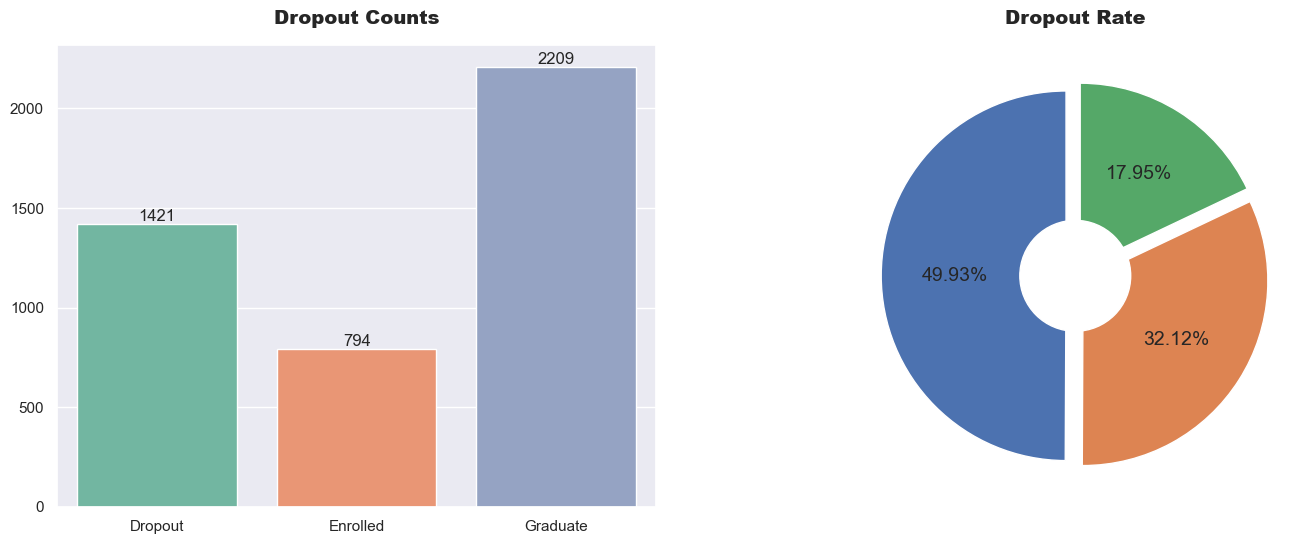

In [11]:
# Set Seaborn aesthetic parameters for all the following plots
sns.set()

# Create a new figure for the plots with a specified size (17x6 inches)
plt.figure(figsize=(17, 6))

# First subplot: Bar plot of churn (or dropout) counts
plt.subplot(1, 2, 1)  # Set up a 1x2 grid of subplots, this is the first plot
# Count the occurrences of each unique value in the 'Target' column
dropout_rate = sub_df['Target'].value_counts()

# Create a color palette based on the number of unique dropout categories
colors = sns.color_palette('Set2', len(dropout_rate))

# Create a bar plot with 'Target' categories on the x-axis and their counts on the y-axis
ax = sns.barplot(x=dropout_rate.index, y=dropout_rate.values, palette=colors)

# Add a title to the bar plot with custom font weight, size, and padding
plt.title("Dropout Counts", fontweight="black", size=14, pad=15)

# Loop through each container in the bar plot to add labels showing the height (value) of each bar
for container in ax.containers:
    ax.bar_label(container)

# Second subplot: Exploded pie chart showing dropout percentage
plt.subplot(1, 2, 2)  # Move to the second plot in the 1x2 grid

# Specify the explosion (separation) for each slice in the pie chart (0.05 for slight separation)
explode = [0.05] * len(dropout_rate)

# Create a pie chart of the dropout rate with percentage labels, larger text, and starting angle at 90 degrees
plt.pie(dropout_rate, autopct="%.2f%%", textprops={
        "size": 14}, startangle=90, explode=explode)

# Create a white circle in the middle to give the pie chart a donut-like appearance
center_circle = plt.Circle((0, 0), 0.3, fc='white')

# Get the current figure and add the white circle to the pie chart
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a title to the pie chart with custom font weight, size, and padding
plt.title("Dropout Rate", fontweight="black", size=14, pad=15)

# Display the final set of plots
plt.show()

### Insight: 
- The largest group is "Graduate," followed by "Dropout," with "Enrolled" having the lowest count.

- Nearly half of the population has graduated (49.93%), while 32.12% are still enrolled. A smaller portion, 17.95%, has dropped out.:
- A significant portion (about 50%) has completed their studies.
- The dropout rate is lower than the enrolled rate, indicating that most students either complete or are still in the process of completing their education.

<Figure size 3000x3000 with 0 Axes>

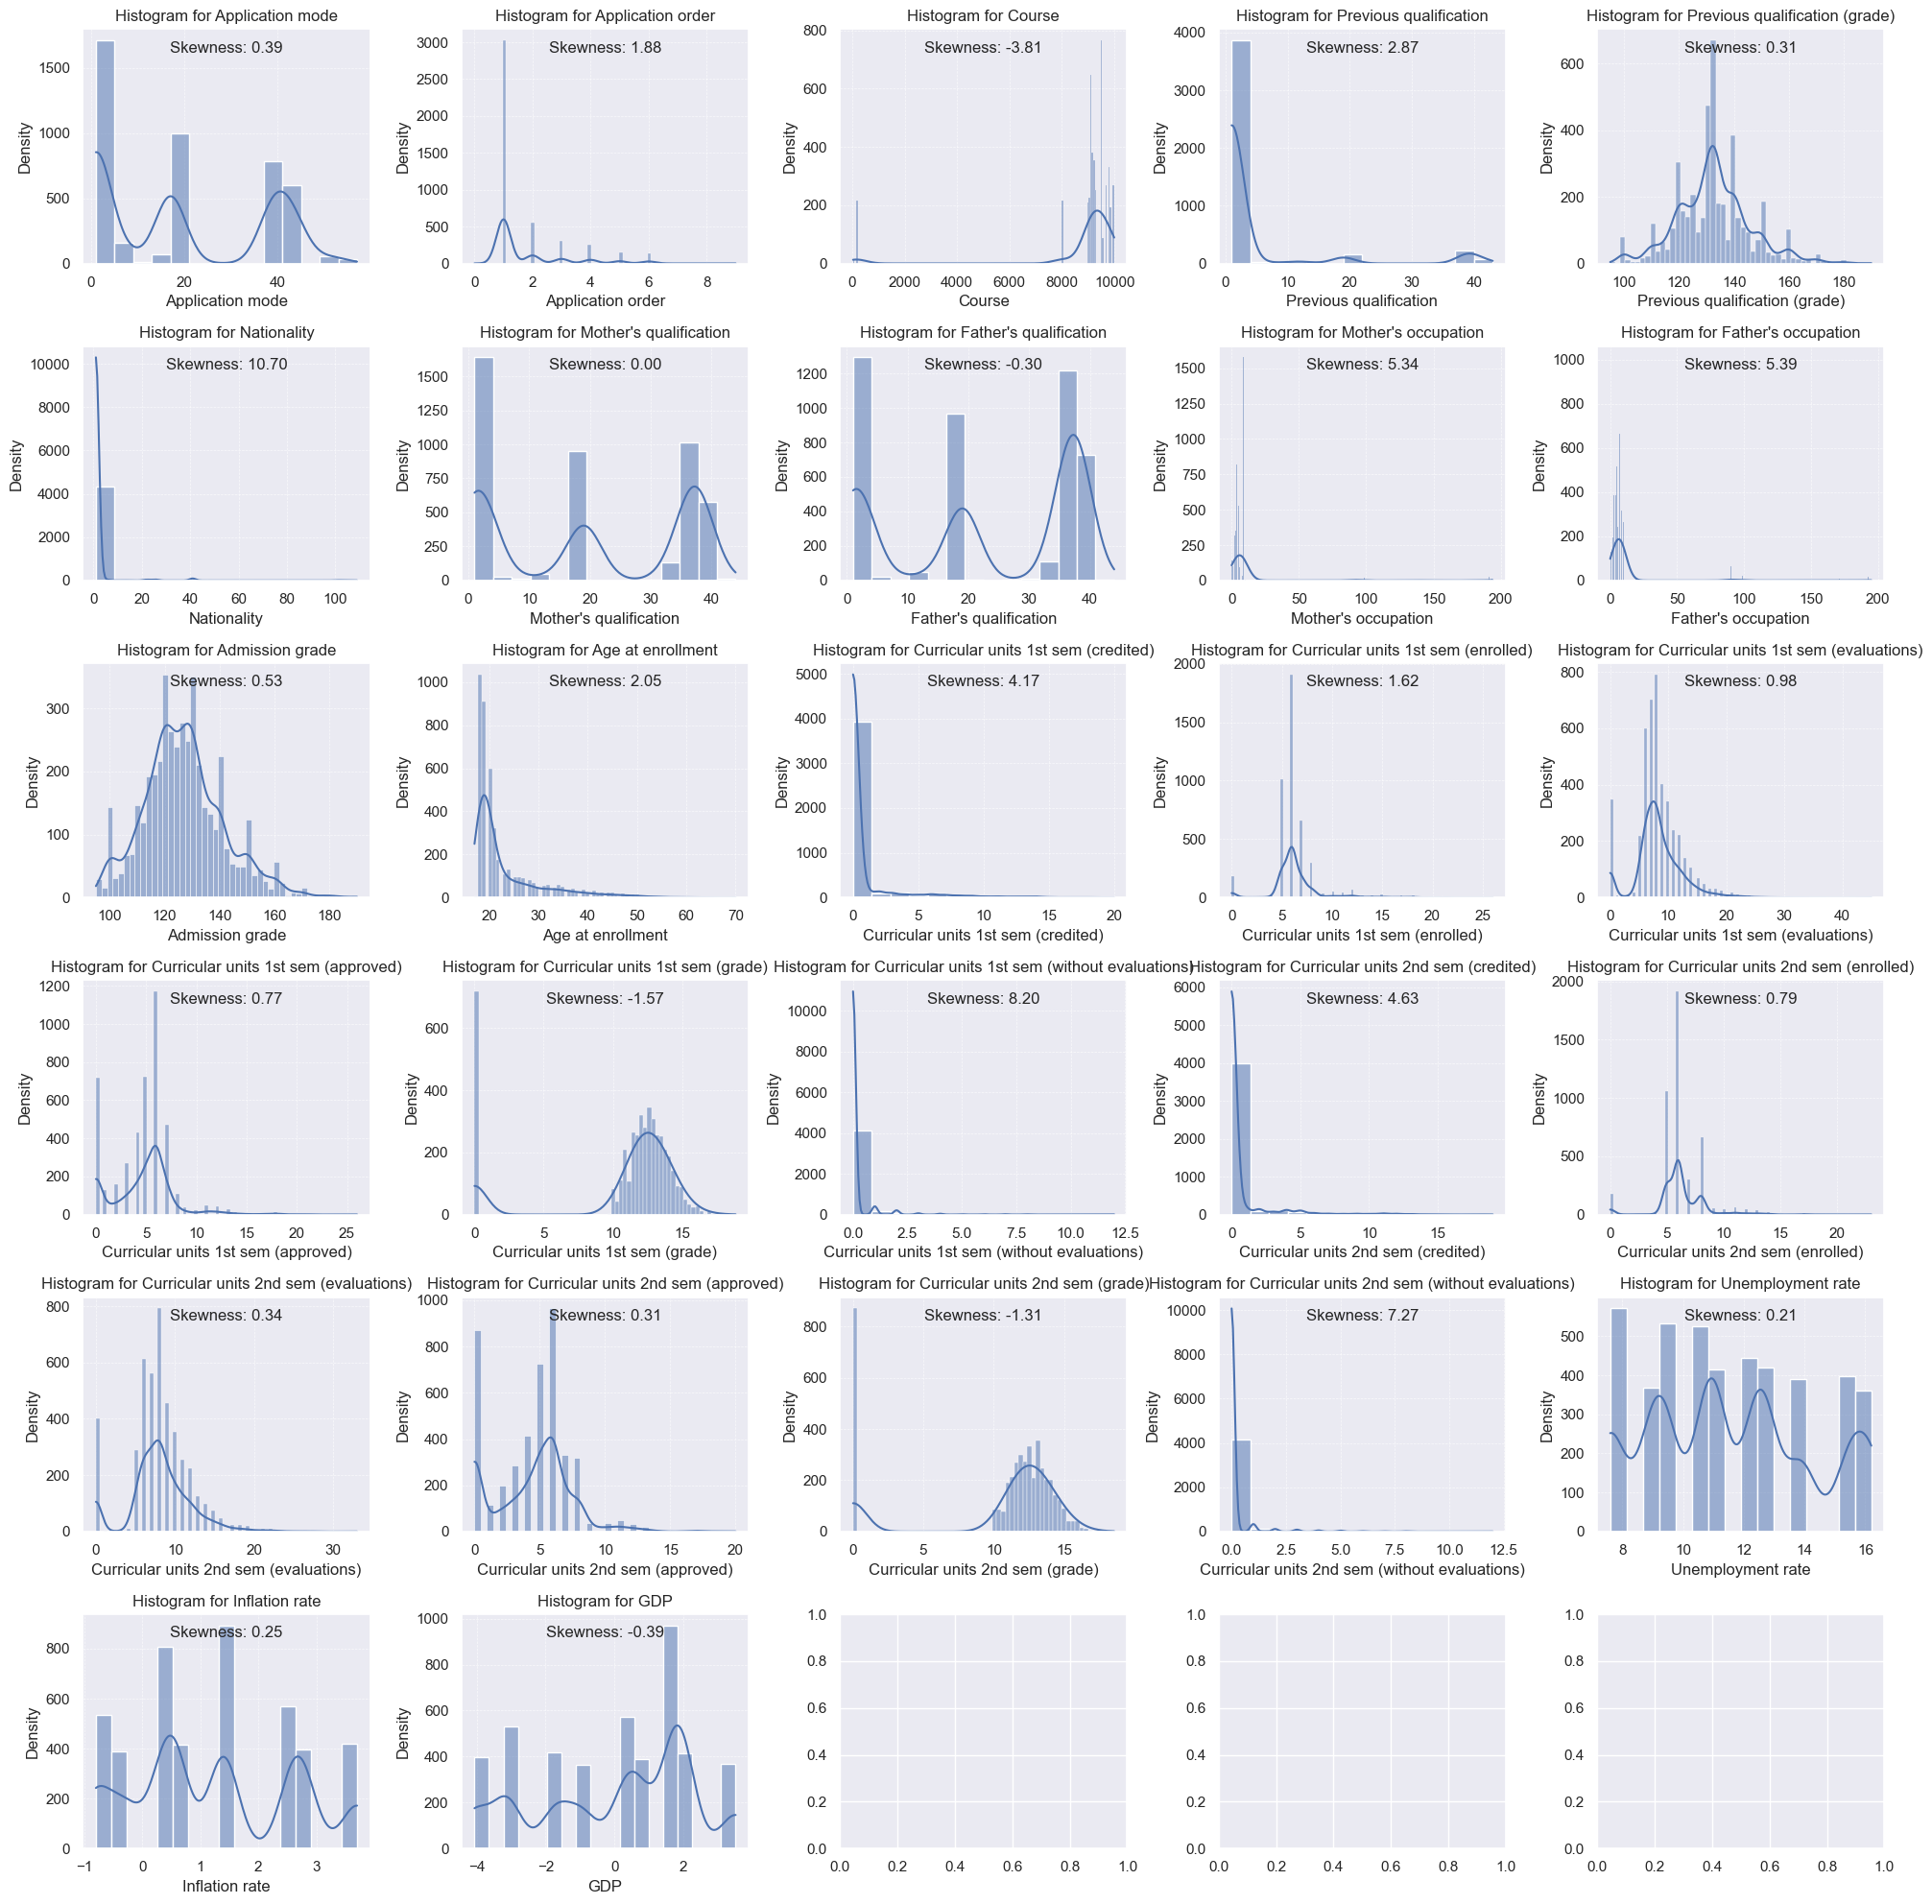

In [12]:
# Set up the figure size for the entire plot
plt.figure(figsize=(30, 30))

# Select all numerical features from the DataFrame (features of type 'int' or 'float')
numerical_features = sub_df.select_dtypes(include=['int', 'float']).columns

# Define the grid size for the subplots (6 rows, 5 columns) and starting subplot index
a = 6  # Number of rows
b = 5  # Number of columns
c = 1  # Initial counter for subplot positioning (not used in the final code)

# Create subplots grid (6x5) with specified figure size
fig, axes = plt.subplots(nrows=a, ncols=b, figsize=(20, 20))

# Flatten the axes array for easy indexing in the loop
axes = axes.flatten()

# Loop through each numerical feature and create a subplot for it
for i, feature in enumerate(numerical_features):
    # Create a histogram with a kernel density estimate (KDE) for the current feature
    sns.histplot(data=sub_df, x=feature, kde=True, ax=axes[i], palette=colors)

    # Add a background grid to the subplot with customized style
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Set the title and axis labels for each subplot
    axes[i].set_title(f'Histogram for {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

    # Calculate and display the skewness of the feature, placing it on the plot
    skewness = stats.skew(df[feature])
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}',
                 horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

    # Increment the subplot counter (unused in this code, but kept for clarity)
    c += 1

# Adjust the layout to prevent overlapping of subplots and labels
plt.tight_layout()

# Display the plot with all subplots
plt.show()

### Summary
- Application Mode (Skewness: 0.39):

     - Slightly right-skewed, indicating a fairly even distribution, though there are peaks for specific modes.
- Application Order (Skewness: 1.88):

    - Moderately right-skewed, with most applicants applying in earlier orders, and fewer in later ones.
- Course (Skewness: -3.81):

    - Strong negative skew, meaning most students are clustered around specific courses with fewer students in the higher course numbers.
- Previous Qualification (Skewness: 2.87):

    - Highly right-skewed, suggesting most students have a lower range of previous qualifications, with a few higher values.
- Father's and Mother's Qualification:

    - Father's (Skewness: 0.30) and Mother's (Skewness: 0.31) qualifications are both nearly symmetrical, indicating a more balanced distribution.
- Admission Grade (Skewness: 0.53):

    - Slight right skew, with a higher concentration of students around mid to high admission grades.
- Age at Enrollment (Skewness: 2.05):

    - Strong right skew, meaning the majority of students are younger, with fewer older students.
- Curricular Units (1st and 2nd Semesters):

    - Skewness varies across the different categories:
    - 1st sem (credited) (Skewness: 4.17), 1st sem (enrolled) (Skewness: 1.62), and others show high skewness, indicating most students have lower credit or enrollment counts, with fewer at the higher end.
    - 2nd sem (without evaluations) (Skewness: 8.20) shows extreme right skewness, implying most students have very few units without evaluations.
- Inflation Rate (Skewness: -1.98) and GDP (Skewness: 0.7):

    - Inflation is left-skewed, while GDP shows a mild right skew, indicating more balanced distribution but with some outliers.
- Unemployment Rate (Skewness: 1.02):

    - A moderately right-skewed distribution, indicating more frequent occurrences of lower unemployment rates, with fewer high unemployment periods.

Many of the curricular unit features, previous qualifications, and course data are highly skewed, which might suggest the need for transformations (e.g., log transformations) to normalize the data for analysis.
Parental qualifications and admission grades are closer to normal distributions, implying less need for adjustments.
Tailored Interventions: The heavy skew in certain features (e.g., age, curricular units) could indicate the need for targeted interventions or policies, such as supporting older students or those with fewer curricular credits.

<Figure size 3000x3000 with 0 Axes>

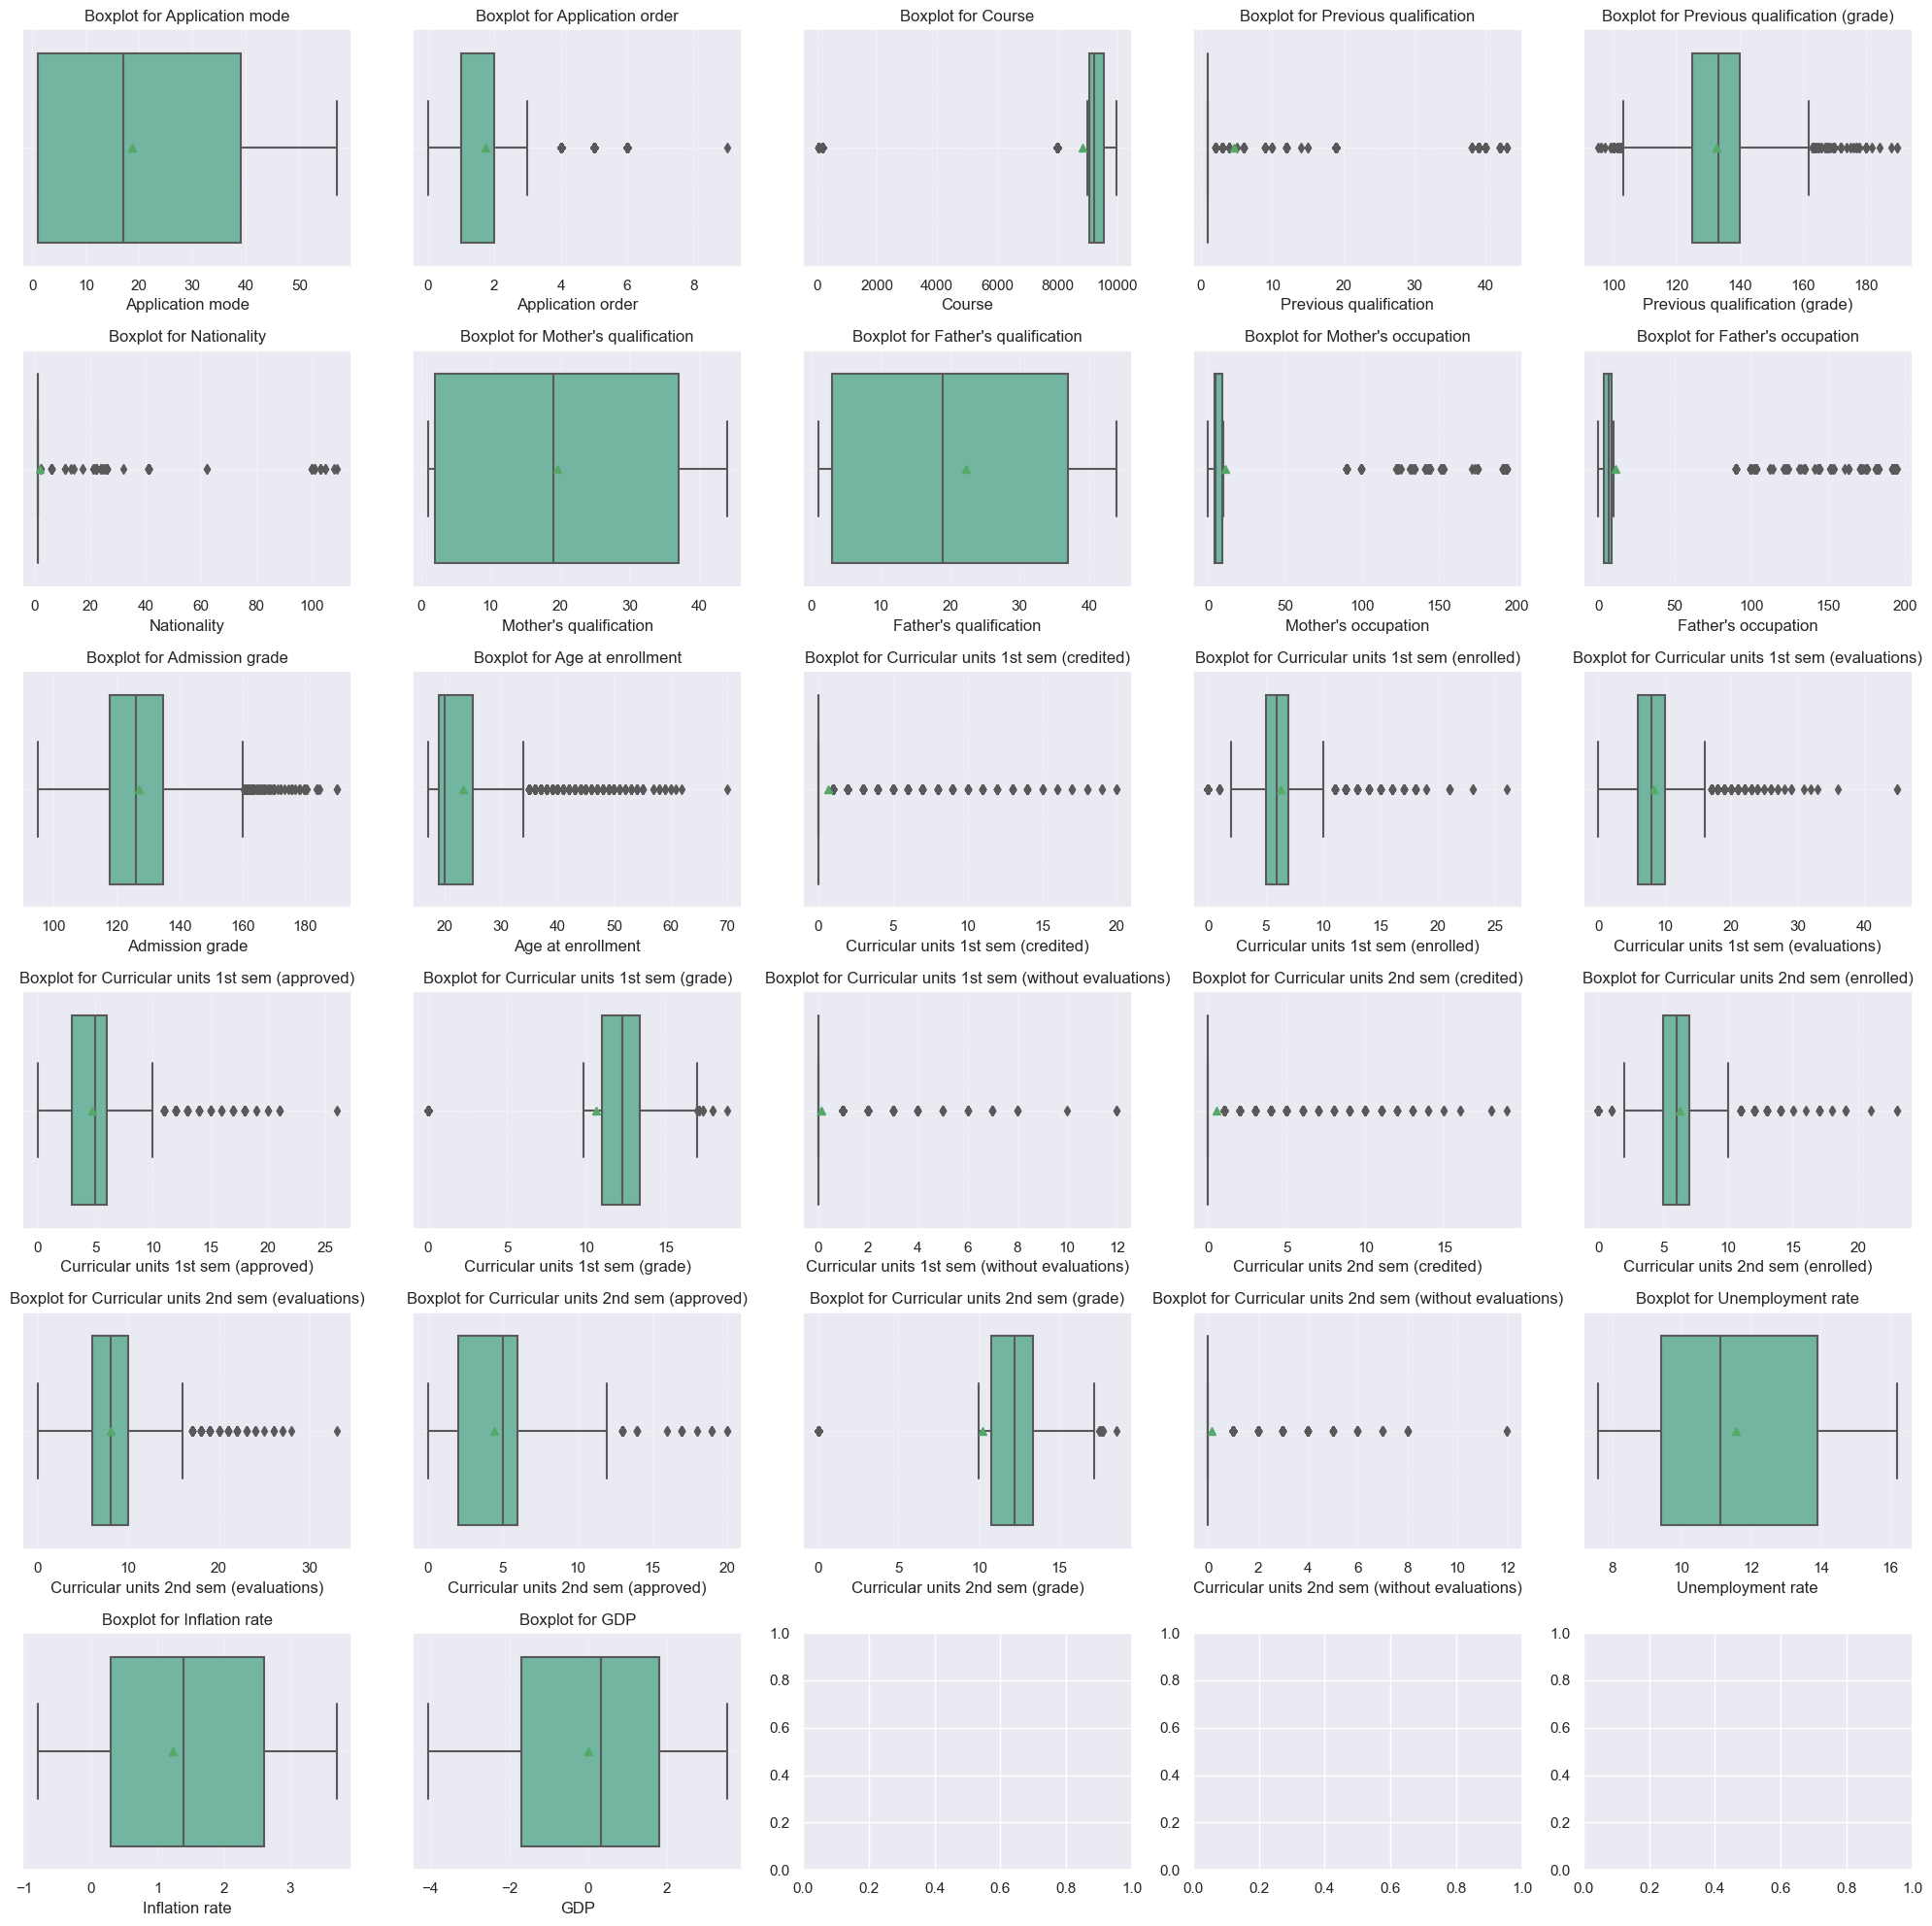

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(30, 30))


# List of numerical features to plot
numerical_features = sub_df.select_dtypes(include = ['int', 'float']).columns

a = 6
b = 5
c = 1

fig, axes = plt.subplots(nrows=a, ncols=b, figsize=(20, 20))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Create subplots for each numerical feature
for i, feature in enumerate(numerical_features):
#     fig, axes =  plt.subplot(a, b, c)
    
    # Create the box plot
    sns.boxplot(data= sub_df, x=feature, ax = axes[i], showmeans = True, palette = colors)
    
    # Add background color and grid
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Add titles and labels
    axes[i].set_title(f'Boxplot for {feature}')
    axes[i].set_xlabel(feature)
    c += 1
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The boxplot above confirms the huge presence of outliers in the numerical columns in the dataset.

In [14]:
# Loop through each column in the DataFrame
for column in sub_df:
    # Print the name of the current column
    print(column, '\n')
    
    # Print the unique values of the current column
    print(sub_df[column].unique(), '\n')


Marital status 

[1, 2, 4, 3, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6] 

Application mode 

[17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27] 

Application order 

[5 1 2 4 3 6 9 0] 

Course 

[ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119] 

Daytime/evening attendance 

[1, 0]
Categories (2, int64): [0, 1] 

Previous qualification 

[ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14] 

Previous qualification (grade) 

[122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174. 

The nature of the Mother's qualification, Father's qualification pair and the Mother's occupation, Father's occupation pair and the way these values betwen them often repeats itself across each pair clearly indicates that these variables are categorical. These variables will be converted to their appropriate datatype later.

# Outlier Analysis

In [15]:
def z_score_outlier_detection(data, threshold=3):
    """
    Detect outliers in a dataset using the Z-score method.

    Parameters:
    - data: array-like or list of numerical values
        The dataset for which outliers are to be detected.
    - threshold: float, optional (default=3)
        The Z-score value above which a data point is considered an outlier.

    Returns:
    - outliers: Pandas Series
        The data points that are considered outliers.
    """
    # Calculate the mean of the data
    mean = np.mean(data)

    # Calculate the standard deviation of the data
    std_dev = np.std(data)

    # Compute the Z-scores for each data point
    z_scores = (data - mean) / std_dev

    # Identify the outliers where the absolute Z-score is greater than the threshold
    outliers = data[np.abs(z_scores) > threshold]

    return outliers

In [16]:
# Iterate over each column in the list of numerical features
for cols in numerical_features:
    # Apply the Z-score outlier detection function to the current column
    outliers = z_score_outlier_detection(sub_df[cols], threshold=3)
    
    # Print the name of the current column
    print(cols, '\n')
    
    # Print the detected outliers for the current column
    # Convert the outliers to a NumPy array and print them
    print(outliers.values, '\n')


Application mode 

[] 

Application order 

[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 9 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6] 

Course 

[171 171  33 171 171 171 171 171 171 171 171 171 171 171  33 171 171 171
 171 171 171  33  33 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171  33 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171  33 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171  33 171 171 171 171 171 171 171 171 171 171 171
 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171 171
 171 17

The constant reoccurence of the outliers in columns such as 'Application order', 'Nationality', 'Course', 'Application mode', 'Previous qualification', 'mother's qualification', 'father's qualification' are very much categorical variables. This will be converted to the appropriate datatype.



To mitigate the effect of outliers in the numerical columns, each numerical values will be transformed using log transformation before data modelling. This will help to reduce the effect of these extreme values.

In [17]:
# Convert specified columns in the DataFrame to categorical data types
sub_df['Application order'] = sub_df['Application order'].astype('category')
sub_df['Nationality'] = sub_df['Nationality'].astype('category')
sub_df['Course'] = sub_df['Course'].astype('category')
sub_df['Application mode'] = sub_df['Application mode'].astype('category')
sub_df['Previous qualification'] = sub_df['Previous qualification'].astype('category')
sub_df["Mother's qualification"] = sub_df["Mother's qualification"].astype('category')
sub_df["Father's qualification"] = sub_df["Father's qualification"].astype('category')
sub_df["Mother's occupation"] = sub_df["Mother's occupation"].astype('category')
sub_df["Father's occupation"] = sub_df["Father's occupation"].astype('category')

# Correlation Analysis

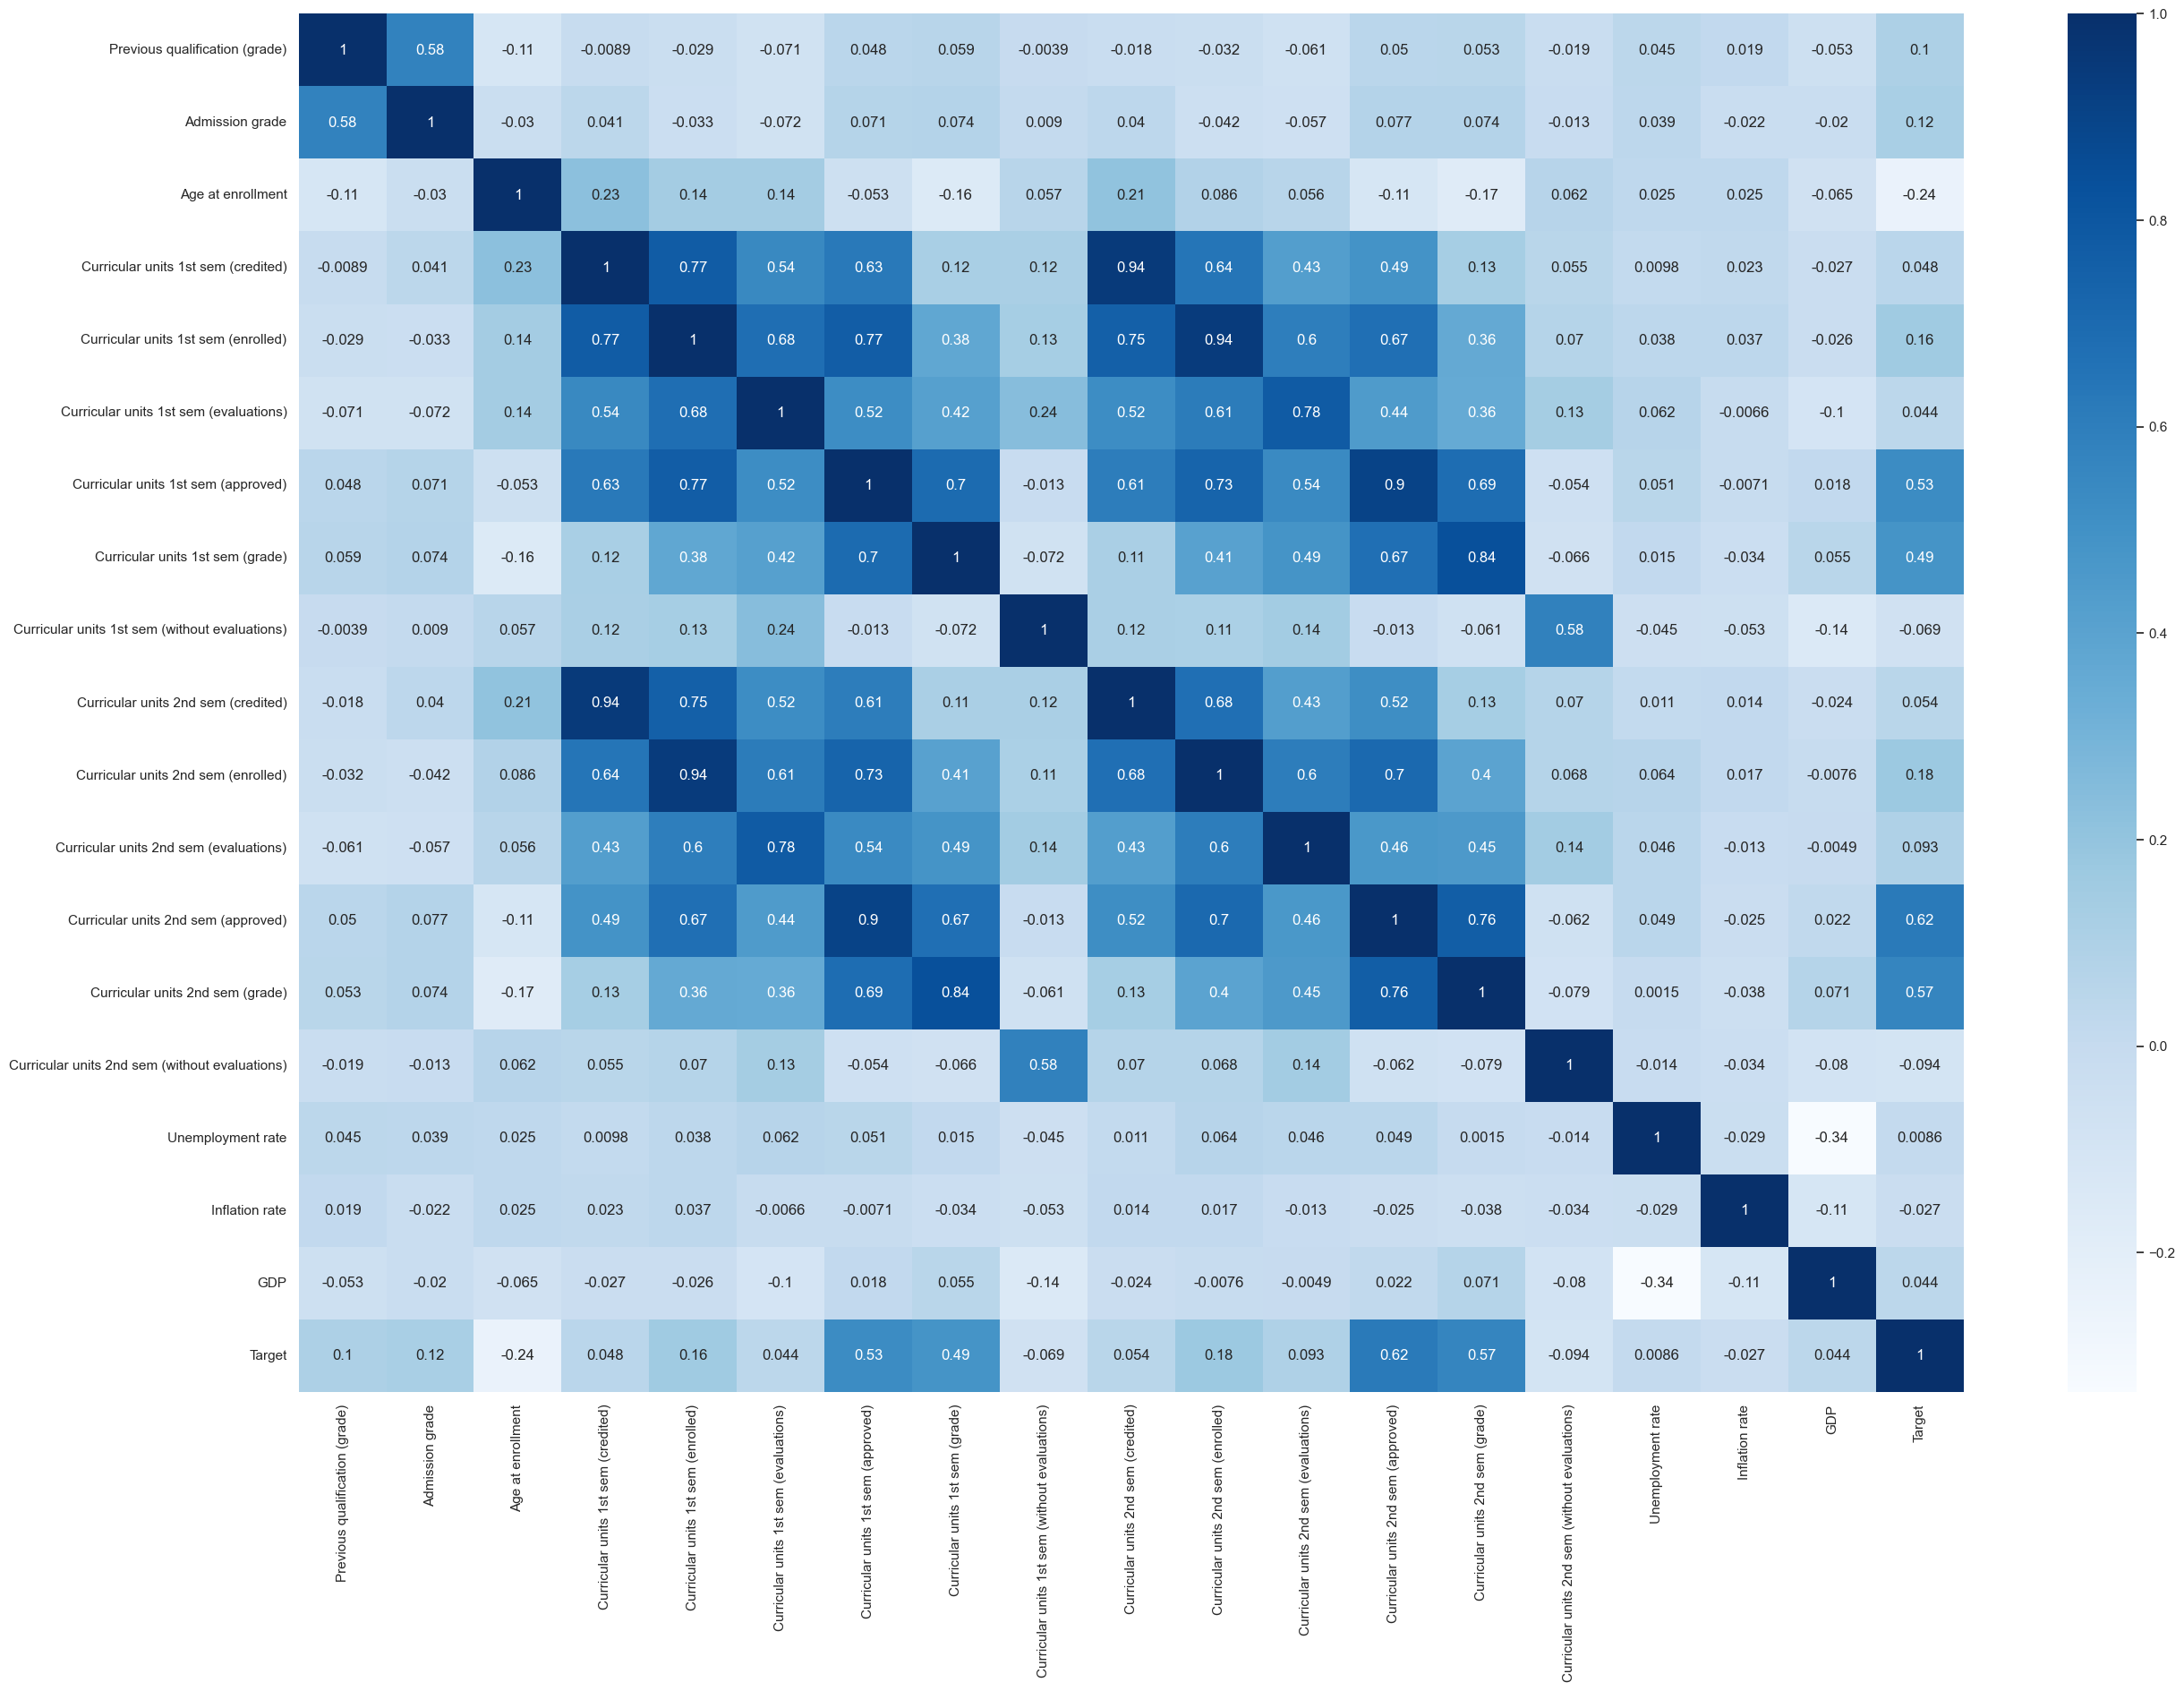

In [18]:
# Replace categorical values in 'Target' column with numerical values and convert to integer type
sub_df['Target'] = sub_df['Target'].replace({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}).astype('int')

# Set up the matplotlib figure with a specified size
plt.figure(figsize=(30, 20))

# Create a heatmap of the correlation matrix of the DataFrame
sns.heatmap(sub_df.corr(), annot=True, cmap='Blues')

# Display the plot
plt.show()


In [19]:
def pie_bar_plot(df, col, Response_col):
    """
    Creates a side-by-side pie chart and bar plot for the given DataFrame columns.
    
    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - col: str
        The column name for which to create the pie chart and bar plot.
    - Response_col: str
        The column name for the response variable to be used for hue in the bar plot.
    """
    # Check if the specified columns exist in the DataFrame
    if col not in df.columns or Response_col not in df.columns:
        raise ValueError(f"One or both columns '{col}' or '{Response_col}' do not exist in the DataFrame.")
    
    # Set up the figure with a specific size
    plt.figure(figsize=(15, 6))

    # Extract and sort value counts for the specified column
    value_counts = df[col].value_counts().sort_index()

    # First subplot: Pie chart
    plt.subplot(1, 2, 1)
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2')

    # Create the pie chart with a "donut" style
    wedges, texts, autotexts = plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, 
                                       startangle=90, colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)

    # Adding legend for the pie chart
    plt.legend(wedges, ax1.index, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(data=df, x=col, hue=Response_col, palette=colors)
    plt.title(f"Target by {col}", fontweight="black", size=14, pad=15)
    plt.xlabel(col, size=12)
    plt.ylabel("Count", size=12)

    # Calculate the total count to compute percentages
    total = df.shape[0]

    # Add value and percentage annotations to each bar
    for p in ax2.patches:
        value = p.get_height()
        percentage = f'{100 * value / total:.2f}%'
        ax2.annotate(f'{value}\n({percentage})',  # Add value and percentage
                     (p.get_x() + p.get_width() / 2., value),  # Center text over the bar
                     ha='center', va='center',                  # Horizontal and vertical alignment
                     xytext=(0, 9),                            # Distance from bar (move text slightly above bar)
                     textcoords='offset points', fontsize=10)   # Use offset for placement
    
    # Adjust legend position to prevent overlap
    plt.legend(title=Response_col, loc="upper right")

    # Adjust layout to prevent overlapping subplots
    plt.tight_layout(pad=3.0)

    # Display the plots
    plt.show()


In [20]:
def hist_with_hue(df, col, response_col):
    """
    Creates side-by-side plots: a histogram with hue and a boxplot.
    
    Parameters:
    - df: DataFrame
        The DataFrame containing the data.
    - col: str
        The column name for which to create the histogram and boxplot.
    - response_col: str
        The column name to be used for hue in the histogram and as x-axis in the boxplot.
    """
    # Set up the figure with a specified size
    plt.figure(figsize=(15, 6))
    
    # First subplot: Histogram with hue
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=response_col, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()  # Get the current Axes instance
    plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)
    
    # Second subplot: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=response_col, y=col, data=df, palette='Set2', showmeans=True)
    plt.title(f"Distribution by {col} & {response_col}", fontweight="black", size=14, pad=10)
    
    # Adjust layout to prevent overlapping subplots
    plt.tight_layout()
    
    # Display the plots
    plt.show()


# Hypothesis Test 1

## Question: Does higher socio-economic status correlates with lower dropout rates?

The socio-economic variables in the dataset includes the Unemployment rate, Inflation rate, the Gross Domestic Product (GDP), the 'Debtor' and the 'Tution fees up to date'. An hypothesis test of the correlation between these variables and the likelihood of dropping out.


To conduct this hypothesis test, a new column called the 'drop_stats' column will be created from the 'Target' column. This column will specify if the student is a dropout or not. The 'enrolled' and the 'graduate' values in this column will be set to 0 indicating that these set of students are not dropout and 1 if otherwise. 

In [21]:
# Creating an indicator column called drop_stats, 0 represents a student who didnot drop out and 1 represents a drop out
sub_df['drop_stats'] = np.where(sub_df['Target'] == 0, 1, 0)

In [22]:
def biserial_correlation_test(x, y, test_name, alpha=0.05):
    """
    Perform a Pearson correlation coefficient test and store the results in a list for tabulation.
    
    Parameters:
    - x: list or numpy array, the first variable
    - y: list or numpy array, the second variable
    - test_name: string, a name or label for the current test
    - alpha: float, the significance level (default = 0.05)
    
    Returns:
    - None, but appends the results to the global test_results list
    """
    # Calculate biserial correlation coefficient and p-value 
    r, p_value = stats.pointbiserialr(x, y)
    
    hypothesis = 'H0: r = 0 vs. H1: r ≠ 0'
    
    # Determine the conclusion based on the p-value
    conclusion = "Reject H0" if p_value < alpha else "Fail to reject H0"
    
    return {
        "Test Name": test_name,
        "Hypothesis": hypothesis,
        "Correlation": r,
        "p-value": p_value,
        "Conclusion": conclusion
    }


### Research Question: Does a higher unemployment rate correlate with lower dropout rates among students?


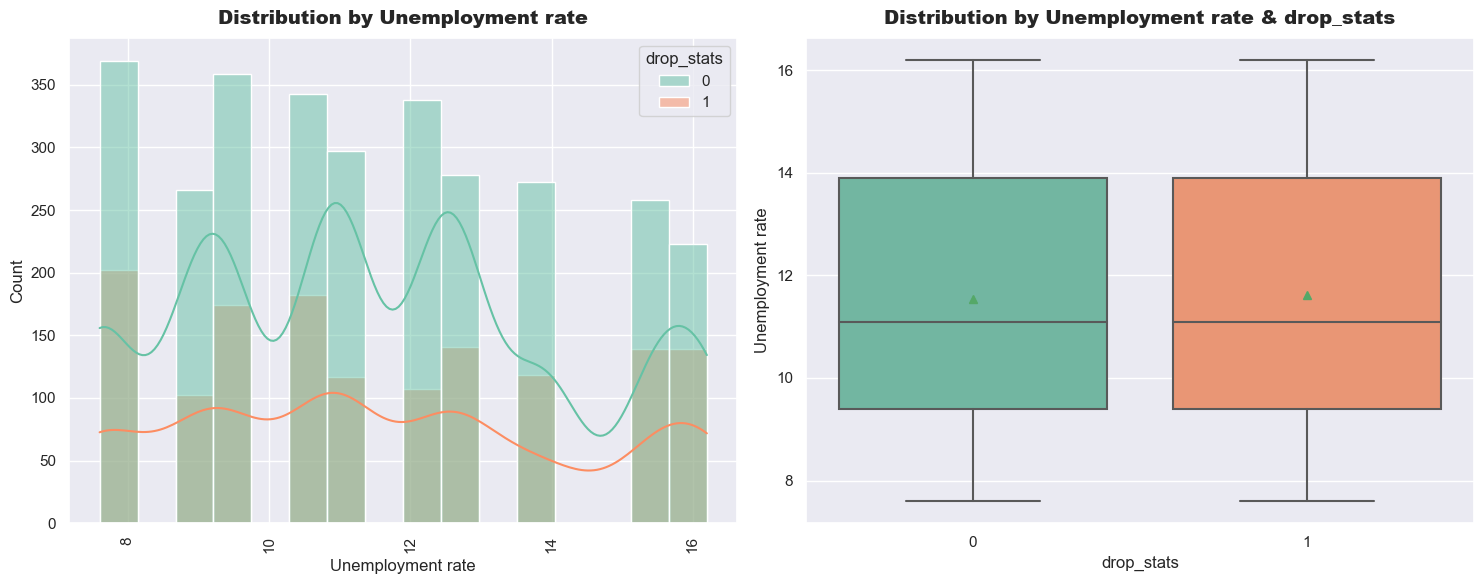

In [23]:
hist_with_hue(sub_df, 'Unemployment rate', 'drop_stats')

#### Overall Insights

The median unemployment rate and the mean unemployment rate for both classes, dropouts and non dropouts are similar.
Now, a point biserial test will be carried out to see if there is a correlation between these groups.

- Null Hypothesis (H₀): There is no correlation between the unemployment rate (socio-economic status) and the likelihood of students dropping out.
- Alternative Hypothesis (H₁): There is a correlation between the unemployment rate (socio-economic status) and the likelihood of students dropping out.
- Significance Level (α): 0.05

Note: If the p value is greater than the significance level or alpha(0.05), we fail to reject the null hypothesis and if the p value is lesser than alpha(0.05), we reject the null hypothesis.

In [24]:
biserial_correlation_test(sub_df['drop_stats'], sub_df['Unemployment rate'], 'Unemployment Rate vs Likelihood of Dropping out')

{'Test Name': 'Unemployment Rate vs Likelihood of Dropping out',
 'Hypothesis': 'H0: r = 0 vs. H1: r ≠ 0',
 'Correlation': 0.012979588012592698,
 'p-value': 0.3880793193339081,
 'Conclusion': 'Fail to reject H0'}

#### Summary:
The correlation coefficient (r) is very close to zero (0.013), indicating a negligible positive correlation between the two variables as previously seen in the plot above. The p-value of 0.388 is much higher than the significance level (α = 0.05), meaning the results are not statistically significant.


There is no evidence to suggest a significant relationship between the unemployment rate and the likelihood of dropping out. Therefore, we fail to reject the null hypothesis that the correlation is zero, implying that unemployment rate does not seem to influence student dropout rates based on this data.

### Research Question: Does a higher Gross Domestic Product correlate with lower dropout rates among students?


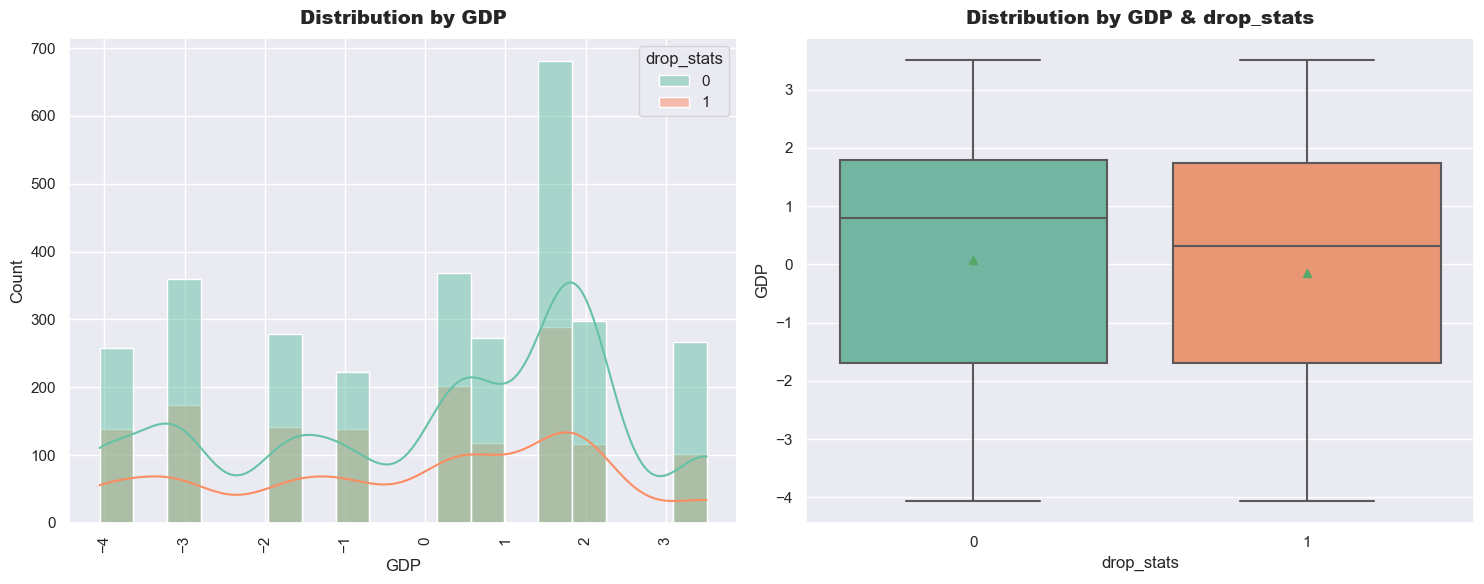

In [25]:
hist_with_hue(sub_df, 'GDP', 'drop_stats')

#### Overall Insight

The median GDP is around 0 for both groups. The variability (as measured by the interquartile range) appears to be slightly higher for students who dropped out. The box plot suggests that while the median GDP is slightly similar for both groups, the distribution of GDP levels around the median is slightly different between the two groups. It also suggests that the mean GDP of both groups are very similar.



A point biserial test will be carried out to see if the difference between these two groups are statistically significant.
- Null Hypothesis (H₀): There is no correlation between the Gross Domestic Product (GDP) and the likelihood of students dropping out.
- Alternative Hypothesis (H₁): There is a correlation between the  Gross Domestic Product (GDP) and the likelihood of students dropping out.
- Significance Level (α): 0.05


In [26]:
biserial_correlation_test(sub_df['drop_stats'], sub_df['GDP'], 'Gross Domestic Product vs Likelihood of Dropping out')

{'Test Name': 'Gross Domestic Product vs Likelihood of Dropping out',
 'Hypothesis': 'H0: r = 0 vs. H1: r ≠ 0',
 'Correlation': -0.046318667664993304,
 'p-value': 0.0020590230851910514,
 'Conclusion': 'Reject H0'}

#### Summary:
The correlation coefficient is 0.046. This indicates a very weak positive correlation between GDP and the likelihood of dropping out. Although the correlation is small, it suggests that as GDP increases, there is a slight increase in the likelihood of students dropping out. 



The p-value (0.002) is much lower than the significance level (α = 0.05), indicating that the result is statistically significant.


There is evidence to suggest a weak but statistically significant correlation between GDP and dropout rates. Based on the data, we reject the null hypothesis (H0), implying that GDP does have a small effect on the likelihood of students dropping out.

### Research Question: Does a higher Inflation Rate correlate with lower dropout rates among students?


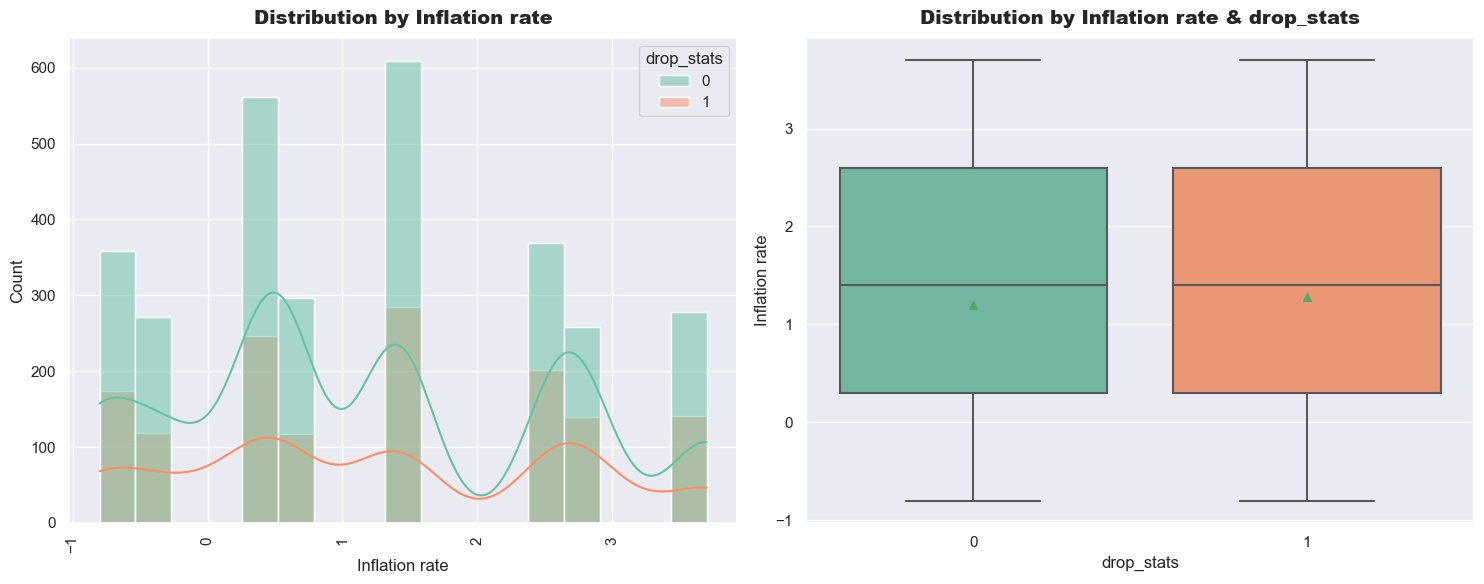

In [27]:
hist_with_hue(sub_df, 'Inflation rate', 'drop_stats')

The median Inflation rate and the mean Inflation rate for both classes, dropouts and non dropouts are similar. Now, a point biserial test will be carried out to see if there is a correlation between these groups.
- Null Hypothesis (H₀): There is no correlation between the Inflation Rate and the likelihood of students dropping out.
- Alternative Hypothesis (H₁): There is a correlation between the  Inflation Rate and the likelihood of students dropping out.
- Significance Level (α): 0.05

In [28]:
biserial_correlation_test(sub_df['drop_stats'], sub_df['Inflation rate'], 'Inflation Rate vs Likelihood of Dropping out')

{'Test Name': 'Inflation Rate vs Likelihood of Dropping out',
 'Hypothesis': 'H0: r = 0 vs. H1: r ≠ 0',
 'Correlation': 0.027826021652786824,
 'p-value': 0.06422253536081998,
 'Conclusion': 'Fail to reject H0'}

#### Summary:
The correlation coefficient (r) is very close to zero (0.023), indicating a negligible positive correlation between the two variables as seen in the plot above. The p-value of 0.123 is much higher than the significance level (α = 0.05), meaning the results are not statistically significant.

There is no evidence to suggest a significant relationship between the Inflation rate and the likelihood of dropping out. Therefore, we fail to reject the null hypothesis that the correlation is zero, implying that inflation rate does not seem to influence student dropout rates based on this data

### Research Question: Does a higher Debt Rate correlate with lower dropout rates among students?

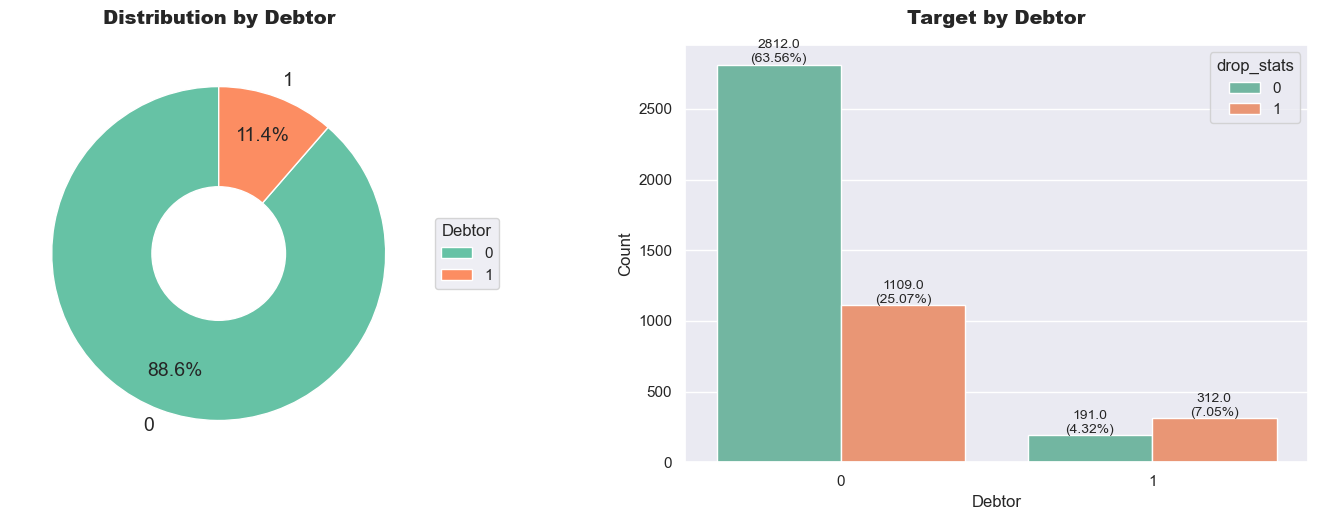

In [29]:
pie_bar_plot(sub_df, 'Debtor', 'drop_stats')

#### Overall Insights.
Among non-debtors (Debtor = 0), 63.56% of the individuals did not drop out, and 25.07% dropped out.
Among debtors (Debtor = 1), 4.32% did not drop out, while 7.05% dropped out.
This indicates a higher dropout rate for debtors compared to non-debtors, even though debtors make up a smaller portion of the dataset.

With the use of the chisquare test, we will see if this difference is statistically significant.

- Null Hypothesis (H₀): Dropout status and debt status are independent (i.e., debt status has no effect on whether a student drops out).


- Alternative Hypothesis (H₁): Dropout status and debt status are not independent (i.e., there is an association between debt status and dropout rates).


- Significance Level (α): 0.05



In [30]:
def chi2_contingency_test(sample1, sample2, test_name="Chi-Square Contingency Test", alpha=0.05):
    """
    Perform a Chi-Square contingency test and store the results in a list for tabulation.
    
    Parameters:
    - contingency_table: a 2D list or numpy array representing the contingency table (observed frequencies)
    - test_name: string, a name or label for the current test
    - alpha: float, the significance level (default = 0.05)
    
    Returns:
    - None, but appends the results to the global chi2_contingency_results list
    """
    
    contingency_table = pd.crosstab(sample1, sample2, margins = True)
    # Conduct the Chi-Square contingency test using scipy
    chi_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table, correction = False)
    
    # Hypothesis for the test
    hypothesis = 'H0: The variables are independent vs. H1: The variables are not independent'
    
    # Determine the conclusion based on the p-value
    conclusion = "Reject H0" if p_value < alpha else "Fail to reject H0"
     
        
    first = contingency_table.values[0]
    second = contingency_table.values[1]
    total = contingency_table.values[2]
    ad = first[0] * second[1]
    bc = first[1] * second[0]
    ab_sum = first[2]
    cd_sum = second[2]
    ac_sum = total[0]
    bd_sum = total[1]
    numerator = ad-bc
    denom = ab_sum * cd_sum * ac_sum * bd_sum
    coeff = numerator/np.sqrt(denom)
     
    return {
        "Test Name": test_name,
        "Hypothesis": hypothesis,
        "Chi-Square Statistic": chi_stat,
        "Degrees of Freedom": dof,
        "p-value": p_value,
        "Conclusion": conclusion,
        "Phi's Coefficient": round(coeff, 5)
    }


In [31]:
chi2_contingency_test(sub_df['Debtor'], sub_df['drop_stats'],
                      test_name="Chi-Square Contingency Test of Debt status and Dropout status", alpha=0.05)

{'Test Name': 'Chi-Square Contingency Test of Debt status and Dropout status',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 232.825009318936,
 'Degrees of Freedom': 4,
 'p-value': 3.253913130581391e-49,
 'Conclusion': 'Reject H0',
 "Phi's Coefficient": 0.22941}

Given that the p-value is significantly smaller than the typical alpha level of 0.05, we reject the null hypothesis. This means that there is a strong association between debt status and dropout status.
Phi's coefficient measures the strength of the association between the two variables. A value of 0.22941 indicates a moderate positive association. This means that as debt status increases, the likelihood of dropping out also tends to increase.

### Research Question: Does a higher Rate of Non Payment of Tuition fees correlate with lower dropout rates among students?

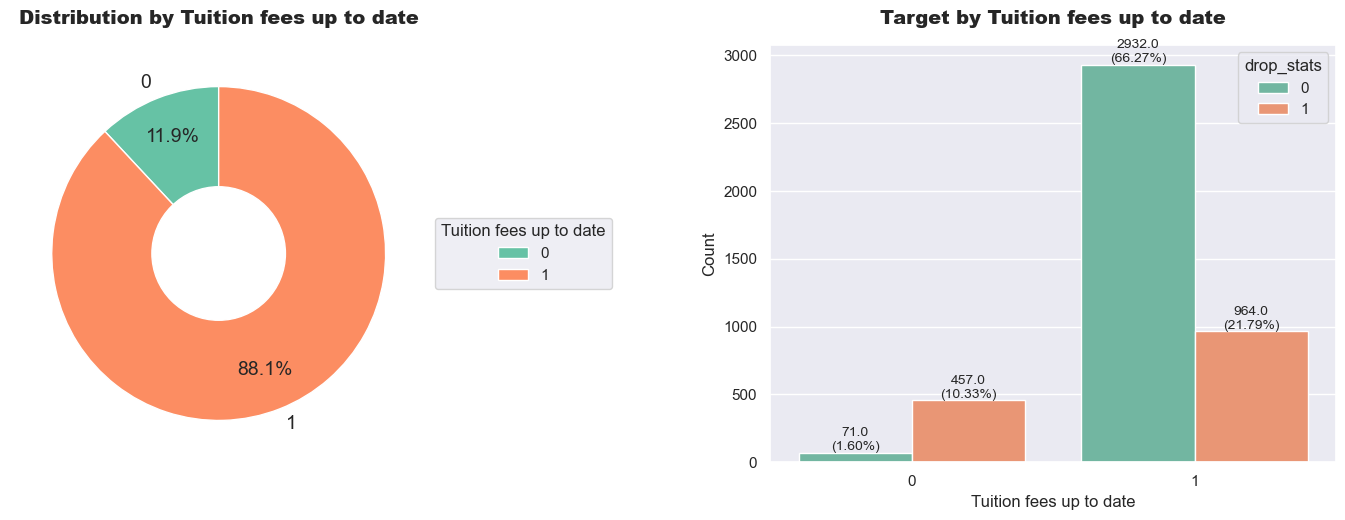

In [32]:
pie_bar_plot(sub_df, 'Tuition fees up to date', 'drop_stats')

#### Overall Insights.
88.1% of individuals have their tuition fees up to date (represented by 1). 11.9% have not paid their tuition fees (represented by 0).
This shows that the majority of individuals in the dataset have paid their tuition fees on time.

Among those who have their tuition fees up to date (Tuition fees = 1), 66.27% did not drop out, and 21.79% dropped out.
Among those who do not have their tuition fees up to date (Tuition fees = 0), 1.60% did not drop out, while 10.33% dropped out.
This suggests that individuals with unpaid tuition fees have a significantly higher dropout rate compared to those whose fees are up to date.

With the use of the chisquare test, we will see if this difference is statistically significant.

In [33]:
chi2_contingency_test(sub_df['Tuition fees up to date'], sub_df['drop_stats'],
                      test_name="Chi-Square Contingency Test of Tuition fees status and Dropout status", alpha=0.05)

{'Test Name': 'Chi-Square Contingency Test of Tuition fees status and Dropout status',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 814.7641356031282,
 'Degrees of Freedom': 4,
 'p-value': 4.867238091918708e-175,
 'Conclusion': 'Reject H0',
 "Phi's Coefficient": -0.42915}

The p-value is extremely small (4.87e-175), far below any conventional significance threshold (e.g., 0.05). This means that the probability of observing the data assuming the null hypothesis is extremely low.

Given the p-value is much smaller than 0.05, we reject the null hypothesis (H0). This implies that there is a statistically significant relationship between "Tuition fees up to date" status and "Dropout status" — the two variables are not independent.

The Phi's Coefficient of -0.42915 indicates a moderate negative association between the two variables. The negative sign suggests that individuals with up-to-date tuition fees are less likely to drop out, while those with unpaid fees are more likely to drop out.

# Hypothesis Test 2

## Question: Are Students with higher admission grades less likely to drop out?


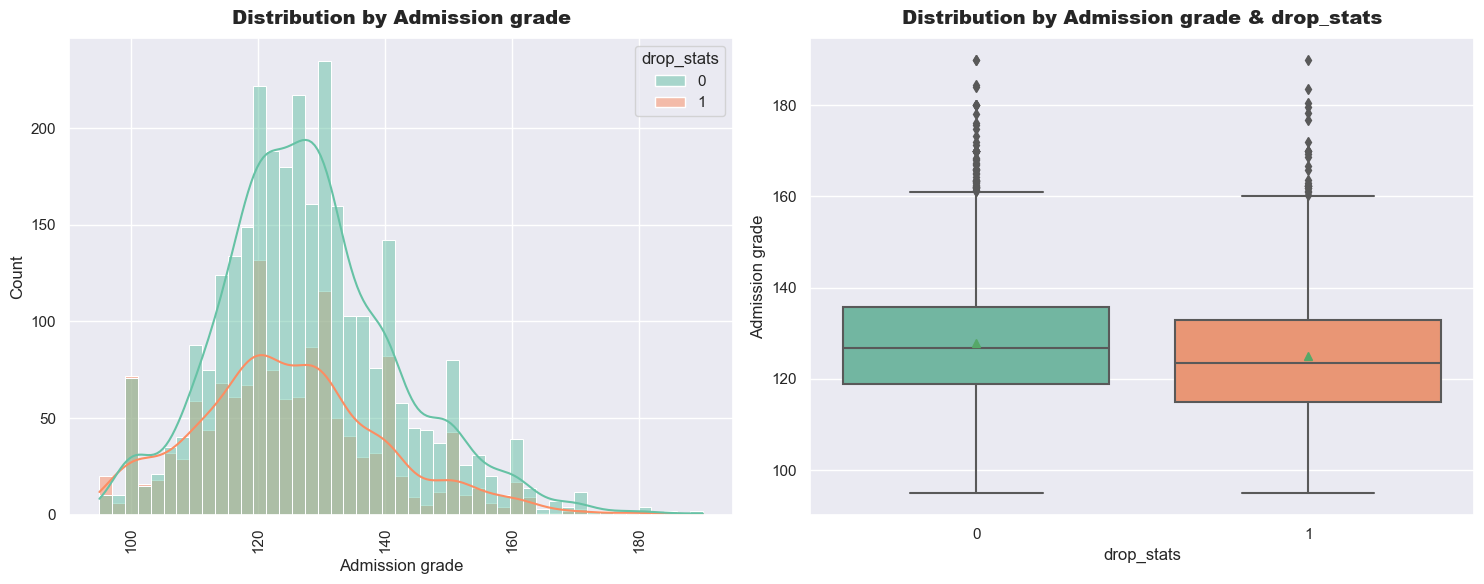

In [34]:
hist_with_hue(sub_df, 'Admission grade', 'drop_stats')

The median Admission grade is around 130 for both groups. The box plot suggests that the median and mean admission grade is slightly higher for non dropouts than dropouts. Next, we test to see if this difference between both groups is statistically significant.

- Null Hypothesis (H₀): There is no difference between the mean Admission grade of Dropouts and Non Dropouts.
- Alternative Hypothesis (H₁): The mean admission grade for Dropouts is lesser than the mean admission grade for Non dropouts.
- Significance Level (α): 0.05



To do this, a left tailed ttest will be used.

In [35]:
dropouts_df = sub_df[sub_df['drop_stats'] == 1]
non_dropouts_df = sub_df[sub_df['drop_stats'] == 0]

In [36]:
def ttest_independent(sample1, sample2, test_name, alternative, alpha=0.05, equal_var = False):
    """
    Perform an independent T-test between two samples and store the results in a list for tabulation.
    
    Parameters:
    - sample1: list or numpy array, the first sample
    - sample2: list or numpy array, the second sample
    - test_name: string, a name or label for the current test
    - alpha: float, the significance level (default = 0.05)
    
    Returns:
    - None, but appends the results to the global ttest_results list
    """
    if stats.levene(sample1, sample2)[1] > alpha:
        equal_var = True
    # Conduct the independent T-test using scipy
    t_stat, p_value = stats.ttest_ind(sample1, sample2, equal_var = equal_var, alternative = alternative)
    
    # Determine the conclusion based on the p-value
    conclusion = "Reject H0" if p_value < alpha else "Fail to reject H0"
    if alternative == 'less':
        hypothesis = 'H0: μ1 = μ2 vs. H1: μ1 < μ2'
    elif alternative == 'greater':
        hypothesis = 'H0: μ1 = μ2 vs. H1: μ1 > μ2'
    else:
        hypothesis = 'H0: μ1 = μ2 vs. H1: μ1 ≠ μ2'
#     # Append the results to the global ttest_results list
#     ttest_results.append({
#         "Test Name": test_name,
#         "Hypothesis": hypothesis,
#         "T-statistic": t_stat,
#         "p-value": p_value,
#         "Conclusion": conclusion
#     })
    return {
    "Test Name": test_name,
    "Hypothesis": hypothesis,
    "T-statistic": t_stat,
    "p-value": p_value,
    "Conclusion": conclusion
}



In [37]:
ttest_independent(dropouts_df['Admission grade'], non_dropouts_df['Admission grade'], 'Admission grade for dropouts vs non dropouts',
                  alternative = 'less')

{'Test Name': 'Admission grade for dropouts vs non dropouts',
 'Hypothesis': 'H0: μ1 = μ2 vs. H1: μ1 < μ2',
 'T-statistic': -6.237124913250986,
 'p-value': 2.590728610201627e-10,
 'Conclusion': 'Reject H0'}

#### Summary


The large negative t-statistic (-6.237) suggests a strong difference between the two groups, with dropouts having significantly lower admission grades than non-dropouts.


The p-value (2.59e-10) is extremely small and well below the significance level (α = 0.05), indicating that the difference is statistically significant.


The evidence strongly supports the alternative hypothesis. We reject the null hypothesis (H0) and conclude that students who dropped out had significantly lower admission grades compared to those who did not.

# Hypothesis Test 3

## Question: Is Dropout rates lower for students receiving financial aid or scholarships?


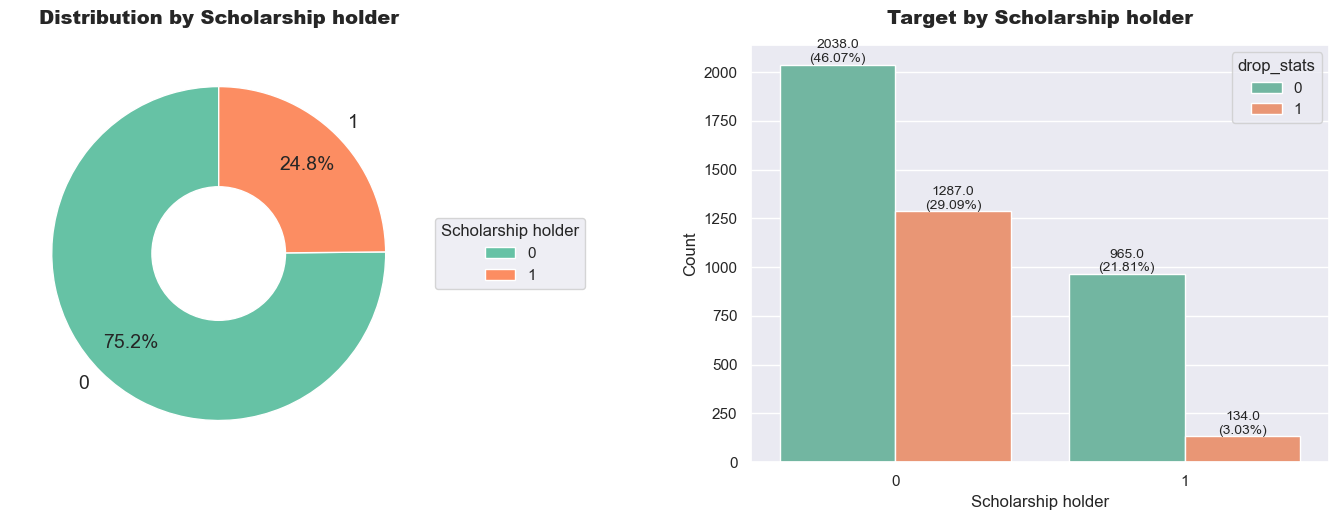

In [38]:
pie_bar_plot(sub_df, 'Scholarship holder', 'drop_stats')

#### Overall Insights.
24.8% of individuals are scholarship holders (represented by 1). 75.2% are not scholarship holders (represented by 0).
This shows that the majority of individuals in the dataset are not scholarship holders.

Among those who do not have a scholarship holders (Scholarship holder = 0), 61.30% did not drop out, and 38.70% dropped out.
Among those who have a scholarship (Scholarship holder = 1), 87.80% did not drop out, while 12.20% dropped out.
This suggests that individuals with do not scholarship have a significantly higher dropout rate compared to those who does.

With the use of the chisquare test, we will see if this difference between dropouts and non dropouts is statistically significant.

- Null Hypothesis (H₀): Dropout status and scholarship status are independent (i.e., scholarship status has no effect on whether a student drops out).


- Alternative Hypothesis (H₁): Dropout status and Scholarship status are not independent (i.e., there is an association between scholarship status and dropout rates).


- Significance Level (α): 0.05



In [39]:
chi2_contingency_test(sub_df['Scholarship holder'], sub_df['drop_stats'], test_name="Chi-Square Contingency Test", alpha=0.05)

{'Test Name': 'Chi-Square Contingency Test',
 'Hypothesis': 'H0: The variables are independent vs. H1: The variables are not independent',
 'Chi-Square Statistic': 266.318360107245,
 'Degrees of Freedom': 4,
 'p-value': 1.9830025983214852e-56,
 'Conclusion': 'Reject H0',
 "Phi's Coefficient": -0.24535}

#### Summary:

The extremely small p-value (1.983E-56 is far below the significance level (α = 0.05), indicating a highly significant result.


Phi's coefficient is a measure of association strength for Chi-square tests. A value of -0.24535 suggests a moderate negative association between the two variables (e.g., as scholarship rate increases, the likelihood of dropout may decrease). This corroborates what we discovered in the plot above.

In [40]:
# Testing the impact of the 'Admission grade', 'GDP', 'Unemployment rate', 'Inflation rate', and the 'Scholarship holder' 
# variables in predicting the likelihood of dropping out
data = sub_df[['Admission grade', 'GDP', 'Unemployment rate', 'Inflation rate', 'Scholarship holder']]
X = sm.add_constant(data)
y = sub_df['drop_stats']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

# Interpret p-values for each predictor variable
for var in data.columns[0:]:  # Skip the constant (intercept)
    if result.pvalues[var] < 0.05:
        print(f"{var} Conclusion------Reject H0: {var} significantly impacts dropout rates.")
    else:
        print(f"{var} Conclusion------Fail to reject H0: No significant evidence that {var} impacts dropout rates.")


Optimization terminated successfully.
         Current function value: 0.588230
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             drop_stats   No. Observations:                 4424
Model:                          Logit   Df Residuals:                     4418
Method:                           MLE   Df Model:                            5
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                 0.06299
Time:                        06:01:29   Log-Likelihood:                -2602.3
converged:                       True   LL-Null:                       -2777.3
Covariance Type:            nonrobust   LLR p-value:                 1.861e-73
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1509      0.333      3.460      0.001       0.499       1.803
Admis

In [41]:
sub_df['Total Units Enrolled'] = sub_df['Curricular units 1st sem (enrolled)'] + sub_df['Curricular units 2nd sem (enrolled)']
sub_df['Total Units Approved'] = sub_df['Curricular units 1st sem (approved)'] + sub_df['Curricular units 2nd sem (approved)']
sub_df['Approval Rate'] = sub_df['Total Units Approved'] / sub_df['Total Units Enrolled']
sub_df['Improvement in Grades'] = sub_df['Curricular units 2nd sem (grade)'] - sub_df['Curricular units 1st sem (grade)']
sub_df['Economic Hardship'] = sub_df['Unemployment rate'] + sub_df['Inflation rate'] - sub_df['GDP']
sub_df['Total Units without Evaluations'] = sub_df['Curricular units 1st sem (without evaluations)'] + sub_df['Curricular units 2nd sem (without evaluations)']

In [42]:
sub_df.drop('drop_stats', axis = 1, inplace = True)

# Data Transformation

All numerical columns in the dataset will be transformed using the log transformation. This will help to reduce the effect of doutliers, reduce the skewness of the data and preserve the nature of the data

In [43]:
cols_to_transform = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']

In [44]:
for col in sub_df[cols_to_transform]:
    sub_df[col] = np.log1p(sub_df[col])

In [45]:
sub_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Unemployment rate,Inflation rate,GDP,Target,Total Units Enrolled,Total Units Approved,Approval Rate,Improvement in Grades,Economic Hardship,Total Units without Evaluations
0,1,17,5,171,1,1,4.812184,1,19,12,...,2.468100,0.875469,1.007958,0,0,0,NaN,0.000000,10.46,0
1,1,15,1,9254,1,1,5.081404,1,1,3,...,2.701361,-0.356675,0.582216,2,12,12,1.000000,-0.333333,12.81,0
2,1,1,5,9070,1,1,4.812184,1,37,37,...,2.468100,0.875469,1.007958,0,12,0,0.000000,0.000000,10.46,0
3,1,17,2,9773,1,1,4.812184,1,38,37,...,2.341806,-1.609438,NaN,2,12,11,0.916667,-1.028571,11.72,0
4,2,39,1,8014,0,1,4.615121,1,37,38,...,2.701361,-0.356675,0.582216,2,12,11,0.916667,0.666667,12.81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,4.836282,1,1,1,...,2.803360,1.335001,NaN,2,12,10,0.833333,-0.933333,22.36,0
4420,1,1,2,9773,1,1,4.795791,105,1,1,...,2.493205,0.470004,1.105257,0,12,8,0.666667,-1.000000,9.68,0
4421,1,1,1,9500,1,1,5.043425,1,37,37,...,2.701361,-0.356675,0.582216,0,15,8,0.533333,-1.412500,12.81,0
4422,1,1,1,9147,1,1,5.198497,1,37,37,...,2.341806,-1.609438,NaN,2,10,10,1.000000,-1.800000,11.72,0


In [46]:
# Saving the transformed data
sub_df.to_csv('scaled_data.csv')